# Plot

## Librairies

In [13]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import pickle

from source.bgt_network import *
from source.network import *
from source.attractors import *
from optim.simulated_annealing import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Preliminary function

In [14]:
def compute_abs_diffs(synapses_l):

    abs_diff_l = []

    for i in range(len(synapses_l)-1):

        abs_diff = np.sum(np.abs(synapses_l[i+1] - synapses_l[i]))
        abs_diff_l.append(abs_diff)

    return abs_diff_l

## Plot for mode `stdp`

In [15]:
filename = "sim_stdp_1001_50_10_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [16]:
nb_attractors, synapses_l = results[0], results[1]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])

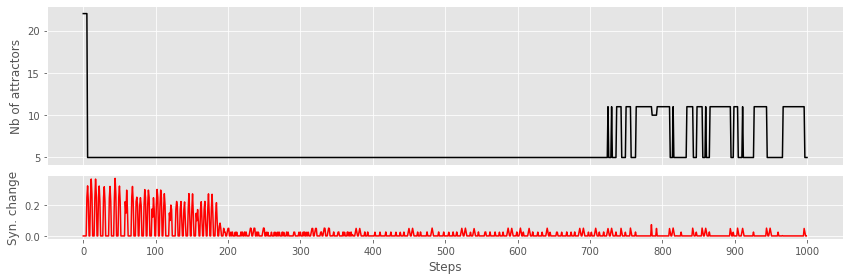

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
# ## Add colored regions for each input chunk
# for start, end in zip(t0s, t1s):
#     ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `gp`

In [18]:
filename = "sim_gp_1001_50_10_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [19]:
nb_attractors = results[0][1:] # remove first element (initial A)
nb_attractors = [-x for x in nb_attractors]
input_length = int(filename.split("_")[2])

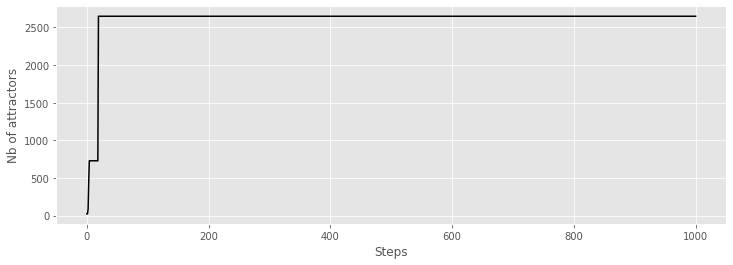

In [20]:
plt.figure(figsize=(12, 4))

# Plot number of attractors
plt.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
plt.xlabel('Steps', size=12)
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `stdp-gp`

In [21]:
filename = "sim_stdp-gp_1001_50_10_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [22]:
nb_attractors, ticks, synapses_l = results[0], results[1], results[2]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])
target_length = int(filename.split("_")[3])

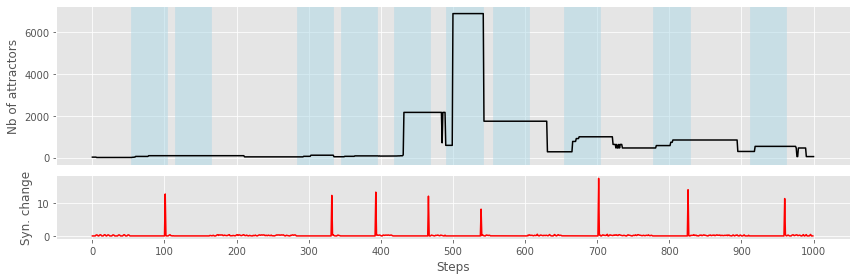

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Chunks start and end points
t0s = ticks
t1s = [start + target_length for start in t0s]

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Combined plots

In [24]:
def get_results(filespecs=(1001, 50, 10, 42)):

    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]
    
    results_d = {}

    for mode in ["stdp", "gp", "stdp-gp"]:

        results_d[mode] = {}

        if mode == "gp":

            filename = f"sim_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pkl"

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]  # remove initial value if needed
            nb_attractors = (-np.array(nb_attractors)).tolist()
            results_d[mode]["nb_attractors"] = nb_attractors

        elif mode == "stdp":
            
            filename = f"sim_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pkl"
            
            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]
            results_d[mode]["nb_attractors"] = nb_attractors
            synapses_l = results[1]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

        elif  mode == "stdp-gp":

            filename = f"sim_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pkl"

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]
            results_d[mode]["nb_attractors"] = nb_attractors
            ticks = results[1]
            results_d[mode]["ticks"] = ticks
            synapses_l = results[2]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

    return results_d

In [25]:
def plot(results_d, filespecs):
    
    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

    # Chunks start and end points
    t0s = results_d["stdp-gp"]["ticks"]
    t1s = [start + trigger_length for start in t0s]

    # Plot number of attractors
    max_gp = max(results_d["gp"]["nb_attractors"])
    ax1.plot(range(input_length), results_d["stdp-gp"]["nb_attractors"], linewidth=2, color="black", label='STDP-GP')
    ax1.plot(range(input_length), results_d["stdp"]["nb_attractors"], linewidth=1, linestyle="--", color="purple", label='STDP')
    ax1.plot(range(input_length), [0]*input_length, linewidth=0, color="black", label=f"simul. ann.: {max_gp}") # fictive plot for legend
    ax1.set_ylabel('Nb of attractors', size=12)
    ax1.grid(True)
    ax1.tick_params(bottom = False) 
    ## Add colored regions for each input chunk
    for start, end in zip(t0s, t1s):
        ax1.axvspan(start, end, color='lightblue', alpha=0.75, label="input streams" if start == t0s[0] else "")
    ax1.legend(loc="upper left")

    # Plot synaptic abs changes
    ax2.plot(range(input_length-1), results_d["stdp-gp"]["syn_change"], color='red', alpha=1)
    ax2.set_xlabel('Steps', size=12)
    ax2.set_ylabel('Syn. change', size=12)
    ax2.set_xticks(range(0, input_length, 100))
    ax2.tick_params(axis='y')
    ax2.grid(True)

    fig.tight_layout()
    plt.savefig(f"plots/plot_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pdf")
    plt.show()

*** nb inputs 1 / seed 42 ***


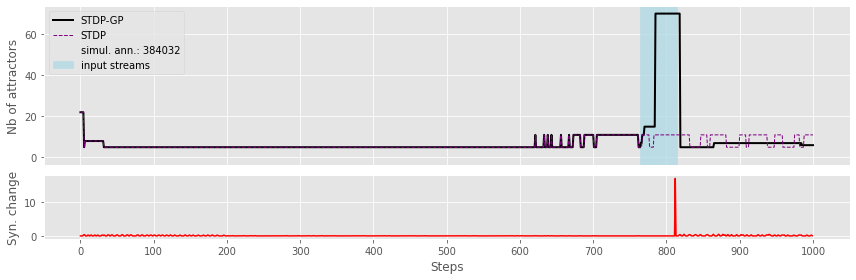

*** nb inputs 1 / seed 79 ***


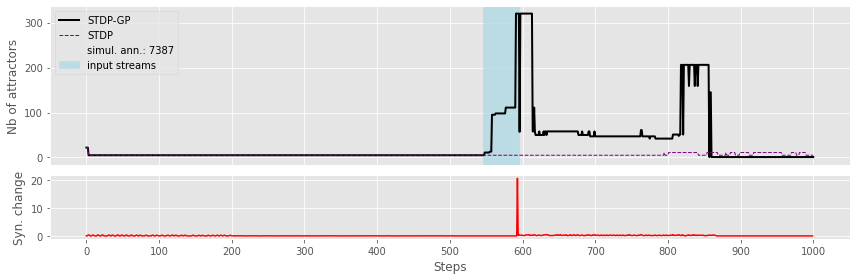

*** nb inputs 1 / seed 82 ***


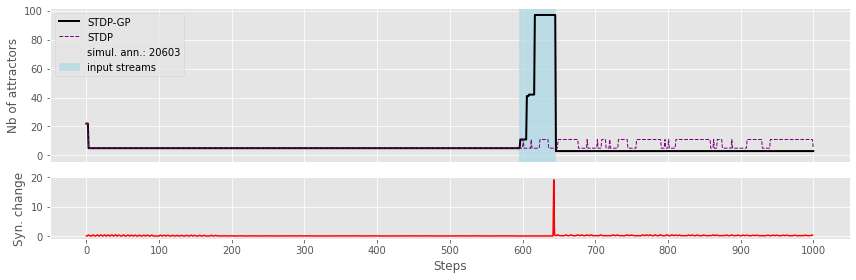

*** nb inputs 1 / seed 83 ***


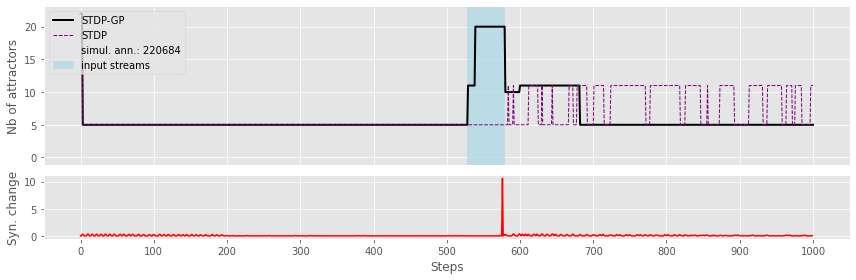

*** nb inputs 1 / seed 47 ***


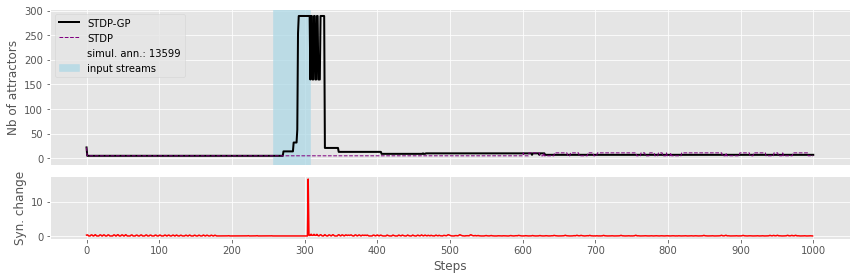

*** nb inputs 1 / seed 49 ***


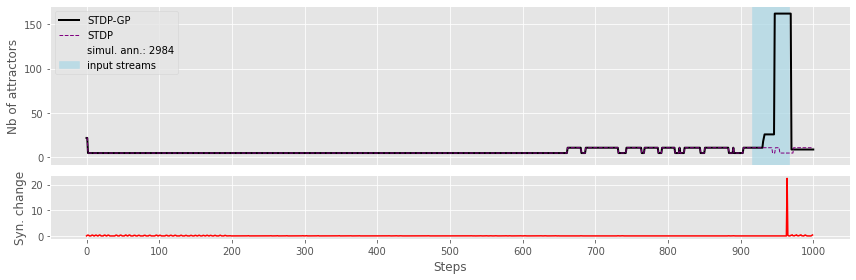

*** nb inputs 1 / seed 13 ***


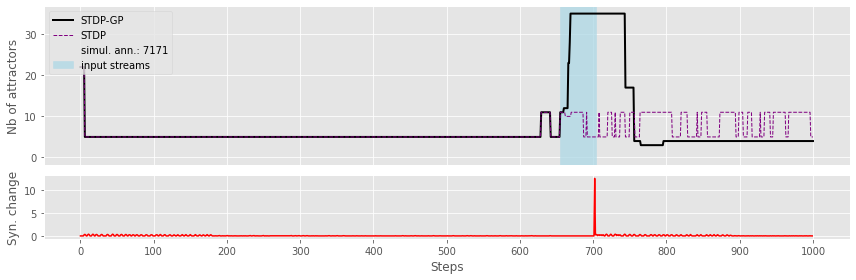

*** nb inputs 1 / seed 77 ***


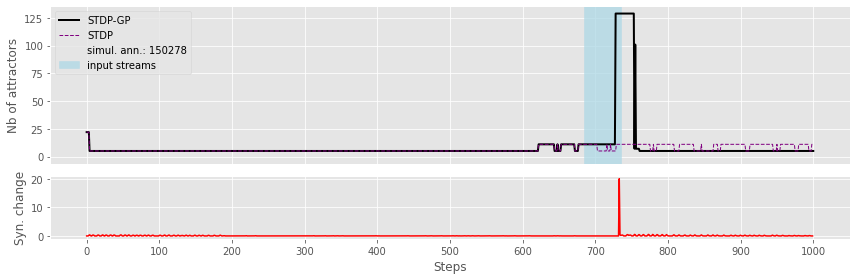

*** nb inputs 1 / seed 55 ***


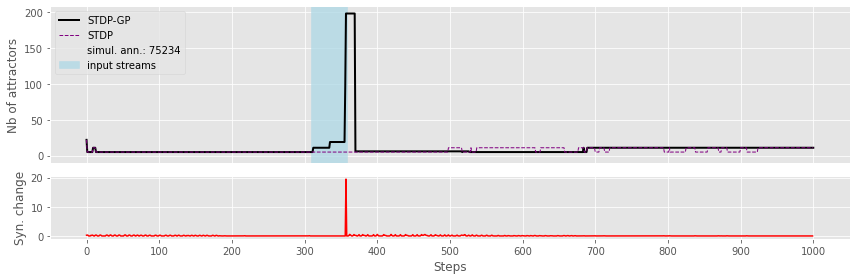

*** nb inputs 1 / seed 15 ***


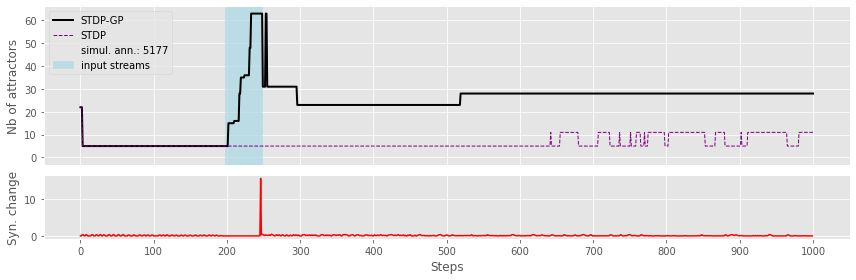

*** nb inputs 3 / seed 42 ***


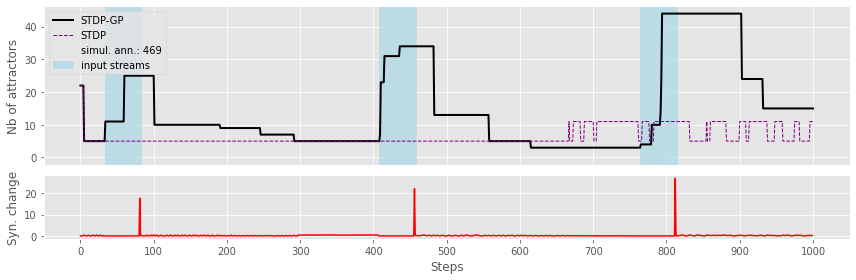

*** nb inputs 3 / seed 79 ***


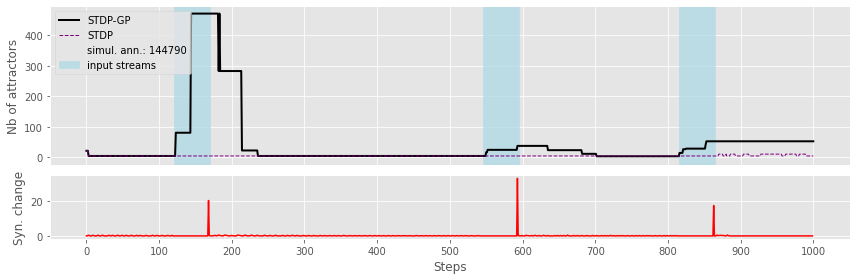

*** nb inputs 3 / seed 82 ***


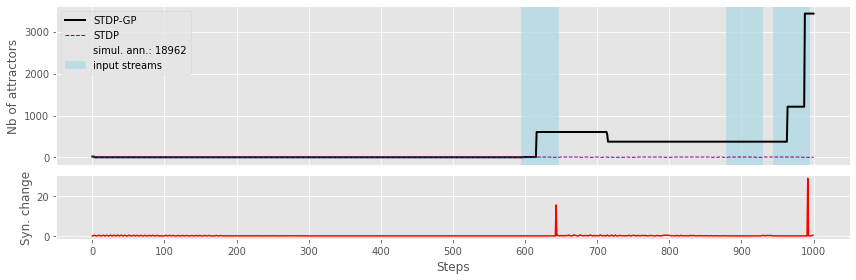

*** nb inputs 3 / seed 83 ***


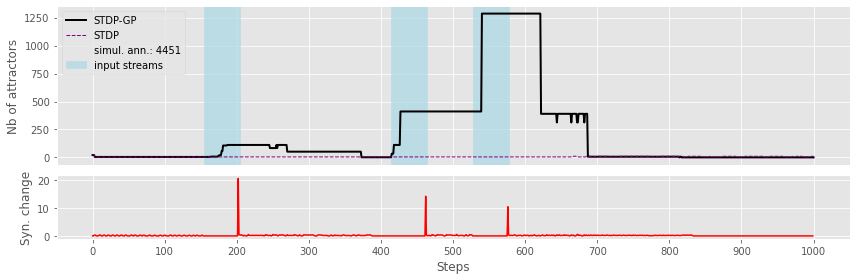

*** nb inputs 3 / seed 47 ***


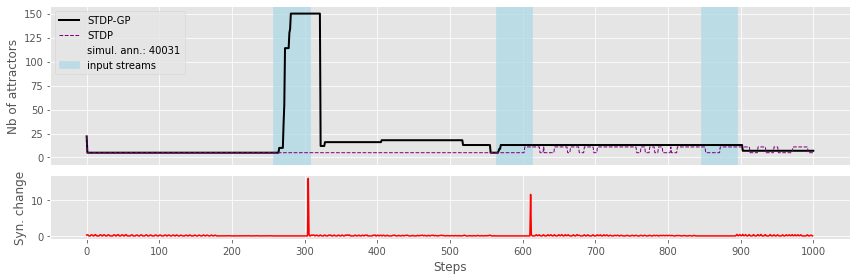

*** nb inputs 3 / seed 49 ***


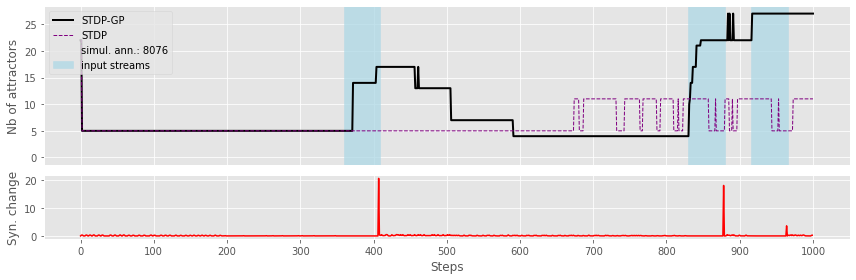

*** nb inputs 3 / seed 13 ***


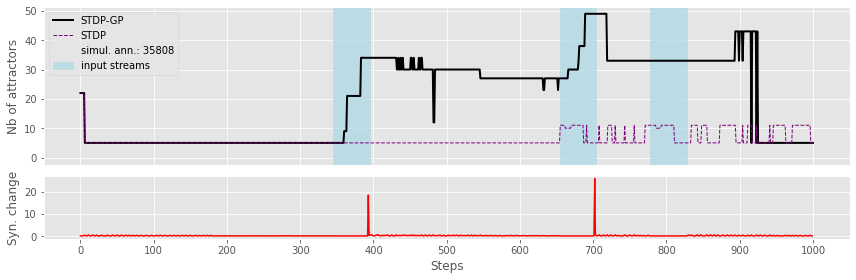

*** nb inputs 3 / seed 77 ***


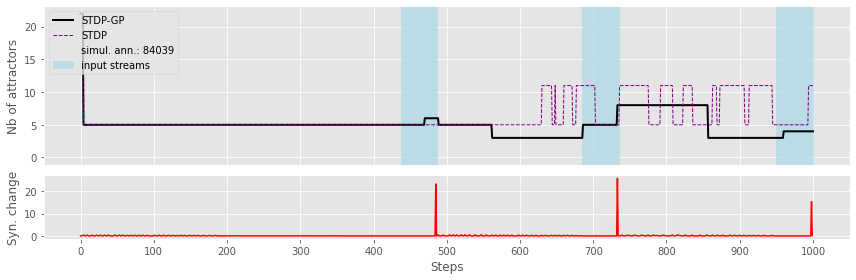

*** nb inputs 3 / seed 55 ***


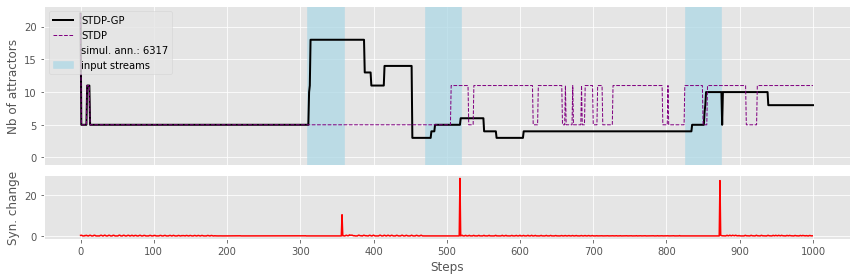

*** nb inputs 3 / seed 15 ***


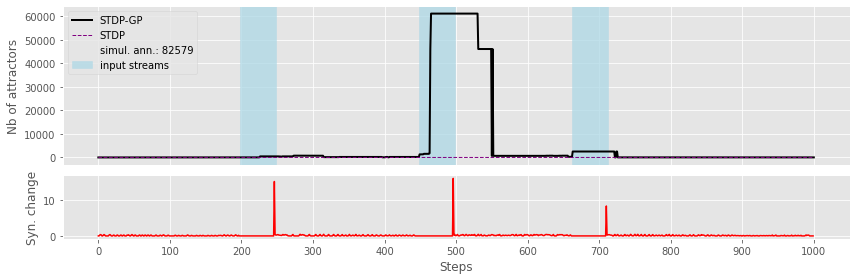

*** nb inputs 5 / seed 42 ***


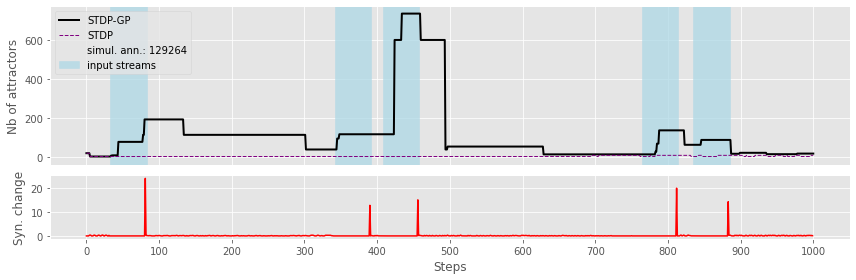

*** nb inputs 5 / seed 79 ***


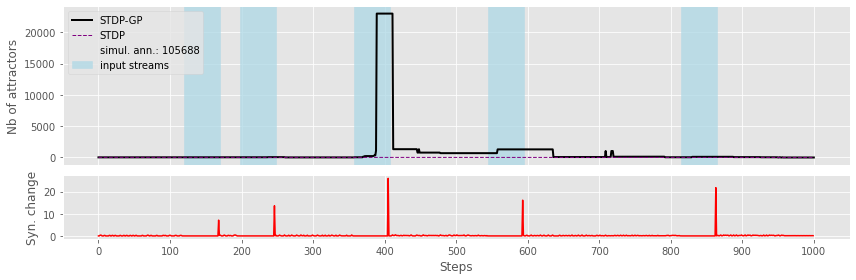

*** nb inputs 5 / seed 82 ***


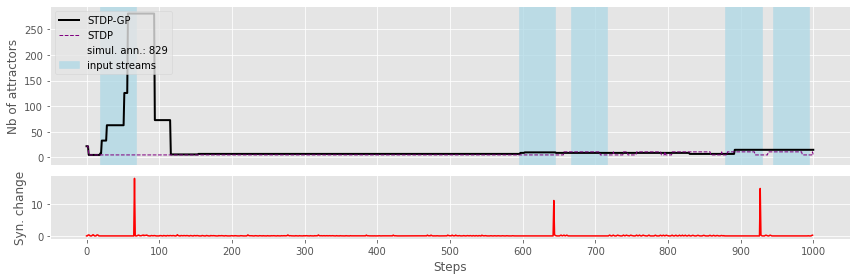

*** nb inputs 5 / seed 83 ***


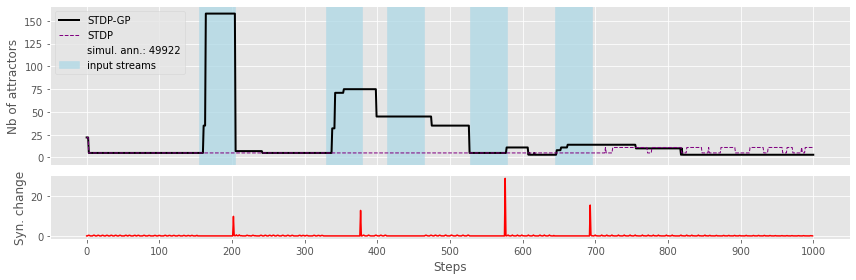

*** nb inputs 5 / seed 47 ***


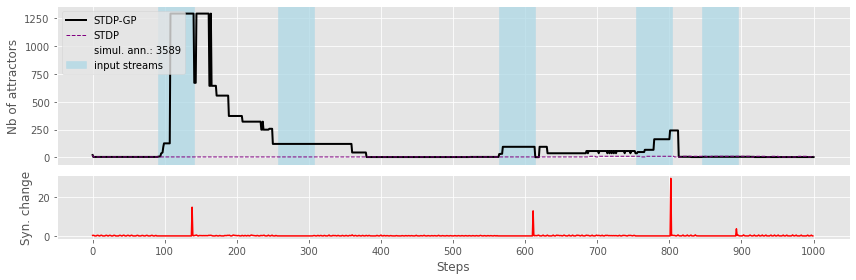

*** nb inputs 5 / seed 49 ***


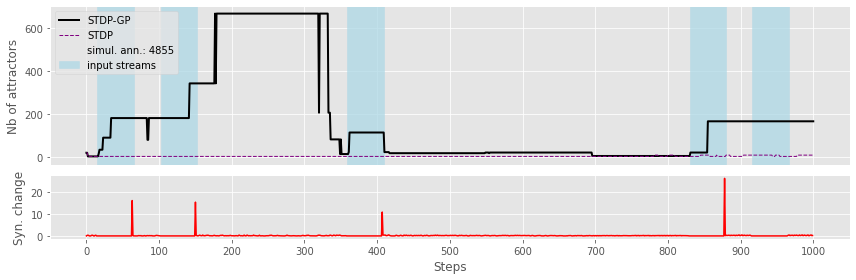

*** nb inputs 5 / seed 13 ***


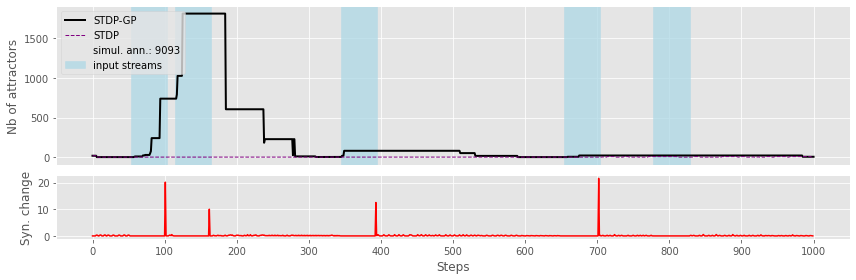

*** nb inputs 5 / seed 77 ***


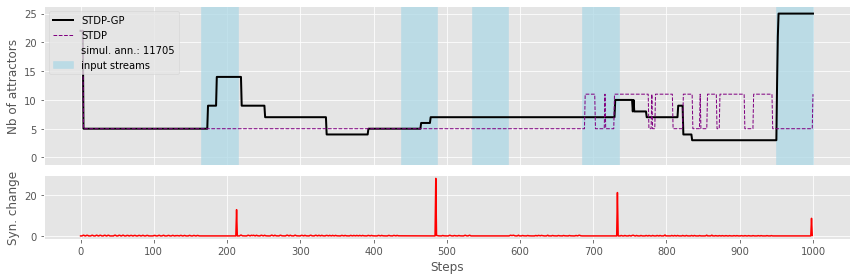

*** nb inputs 5 / seed 55 ***


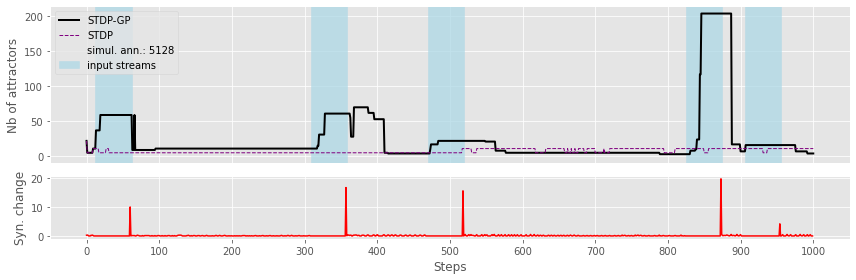

*** nb inputs 5 / seed 15 ***


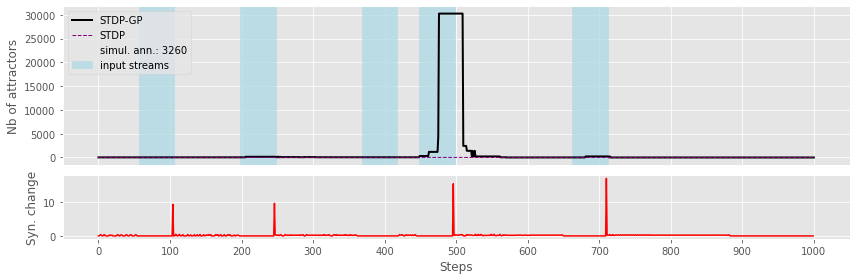

*** nb inputs 7 / seed 42 ***


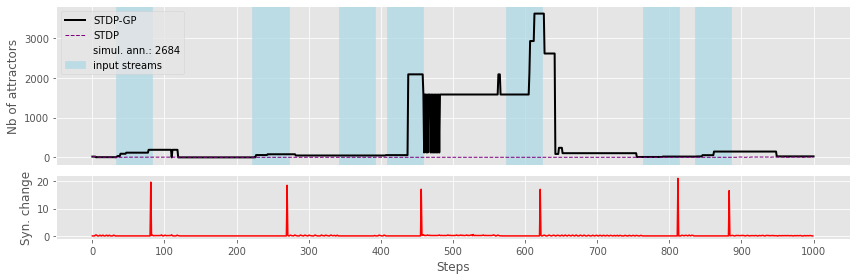

*** nb inputs 7 / seed 79 ***


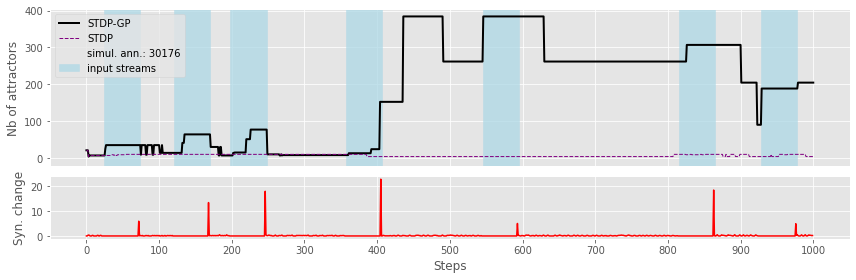

*** nb inputs 7 / seed 82 ***


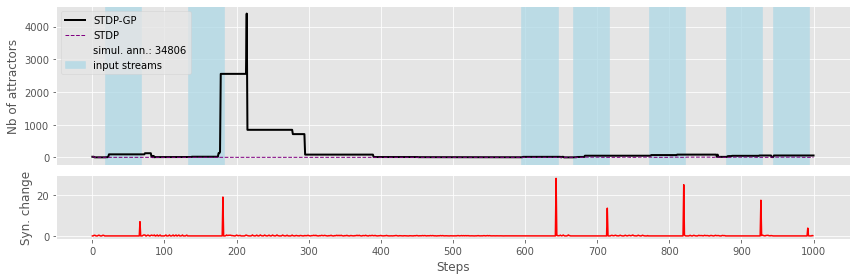

*** nb inputs 7 / seed 83 ***


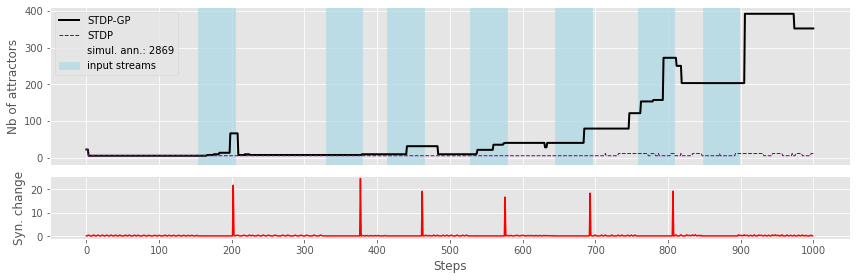

*** nb inputs 7 / seed 47 ***


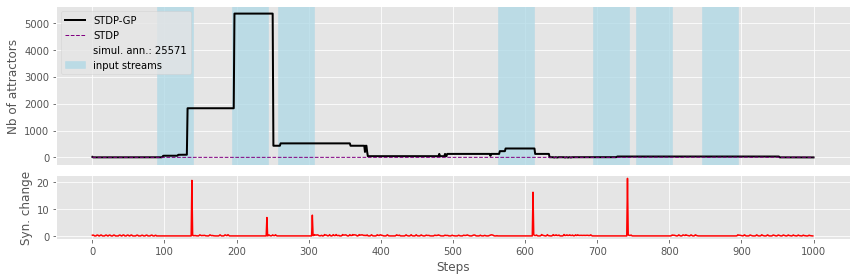

*** nb inputs 7 / seed 49 ***


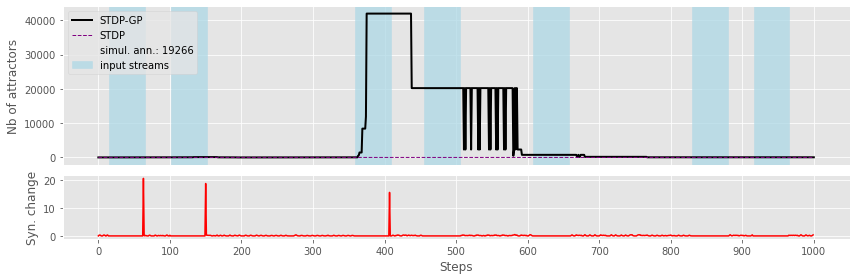

*** nb inputs 7 / seed 13 ***


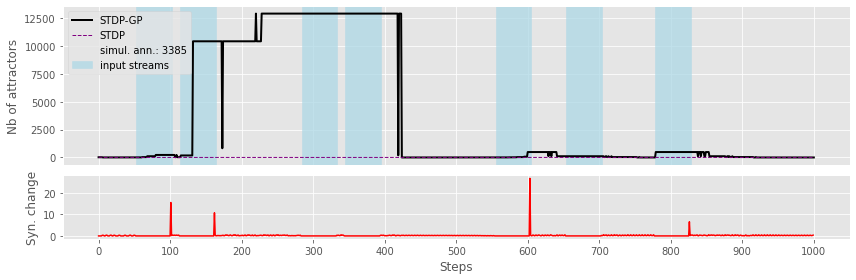

*** nb inputs 7 / seed 77 ***


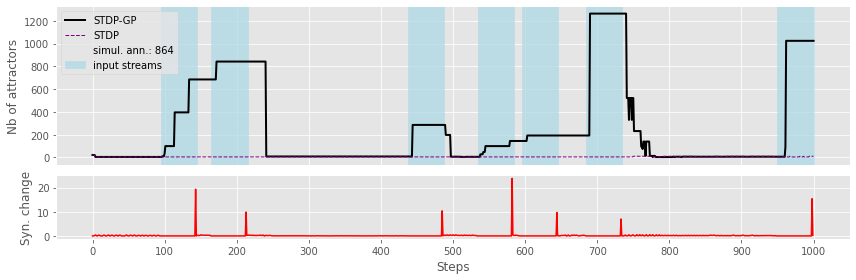

*** nb inputs 7 / seed 55 ***


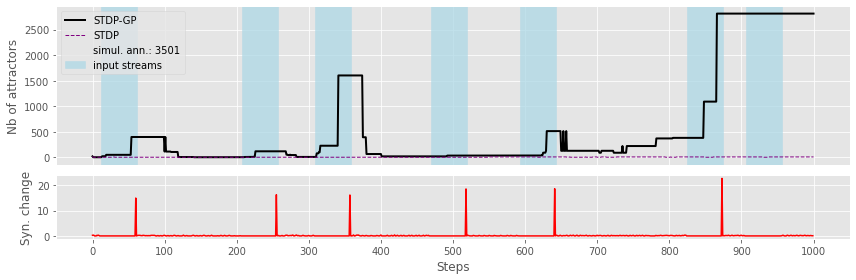

*** nb inputs 7 / seed 15 ***


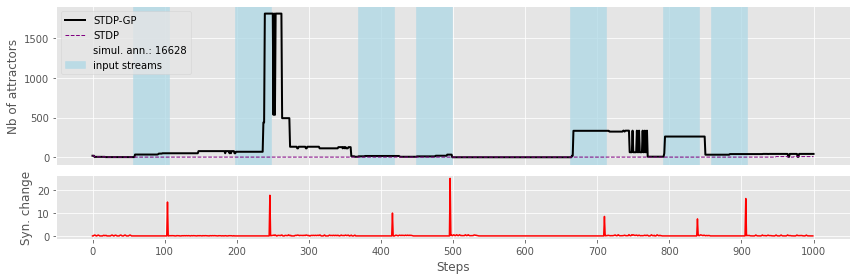

*** nb inputs 9 / seed 42 ***


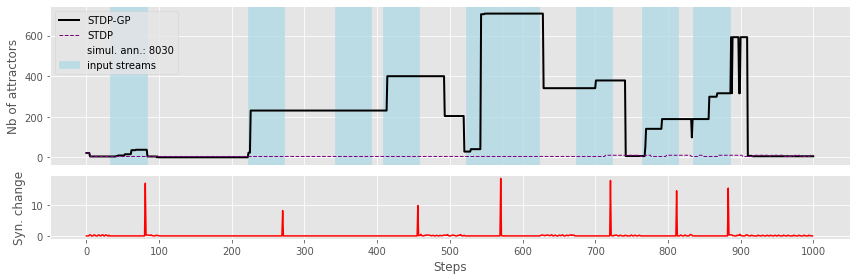

*** nb inputs 9 / seed 79 ***


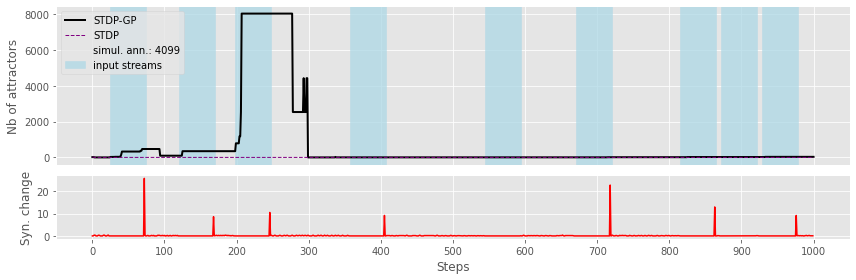

*** nb inputs 9 / seed 82 ***


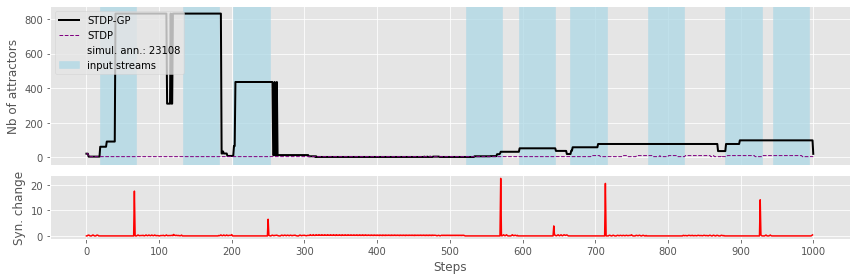

*** nb inputs 9 / seed 83 ***


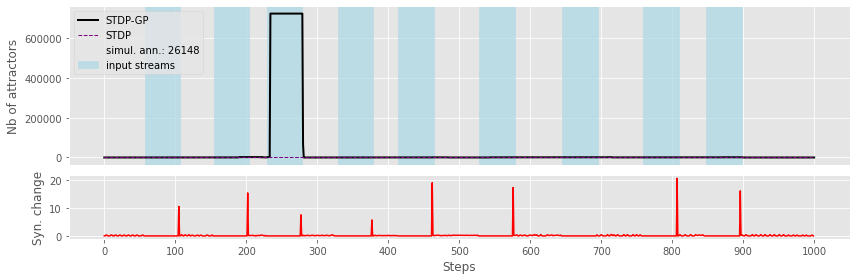

*** nb inputs 9 / seed 47 ***


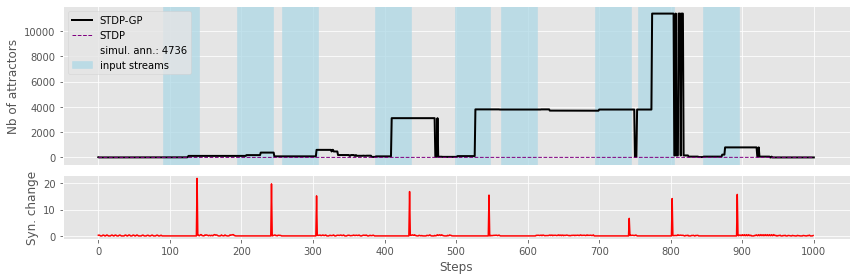

*** nb inputs 9 / seed 49 ***


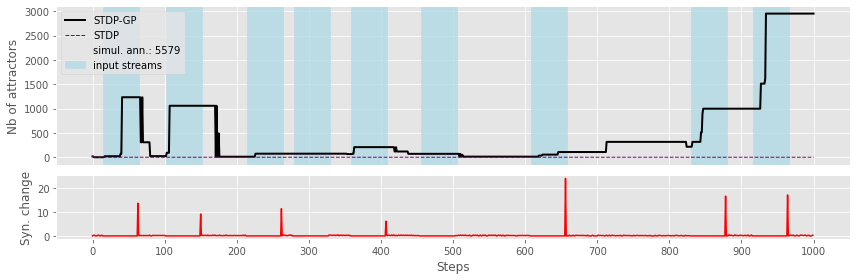

*** nb inputs 9 / seed 13 ***


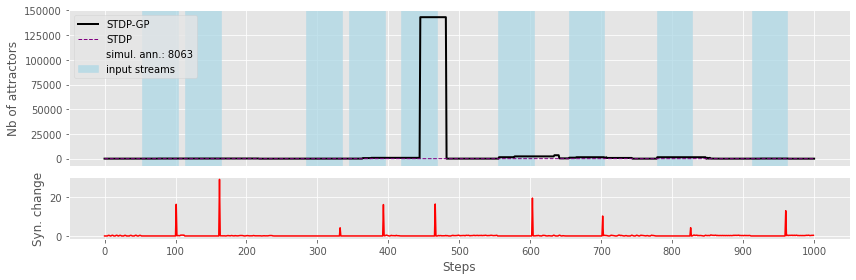

*** nb inputs 9 / seed 77 ***


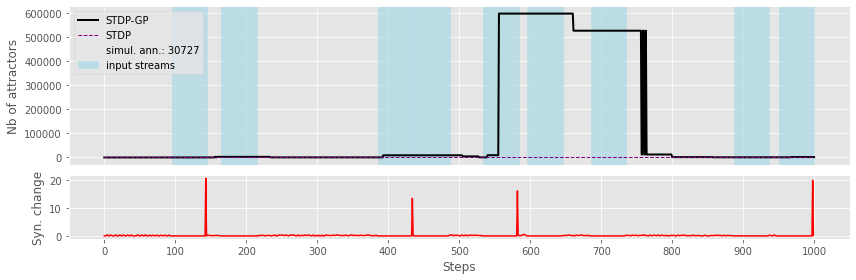

*** nb inputs 9 / seed 55 ***


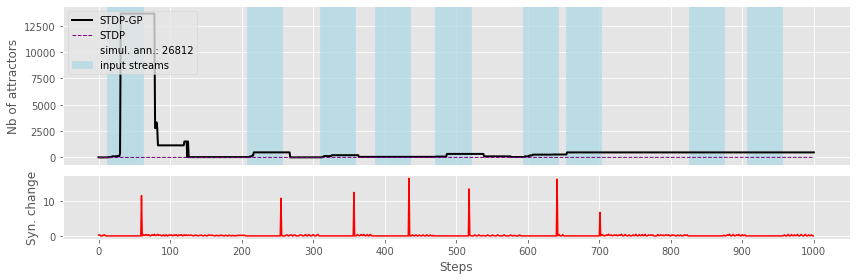

*** nb inputs 9 / seed 15 ***


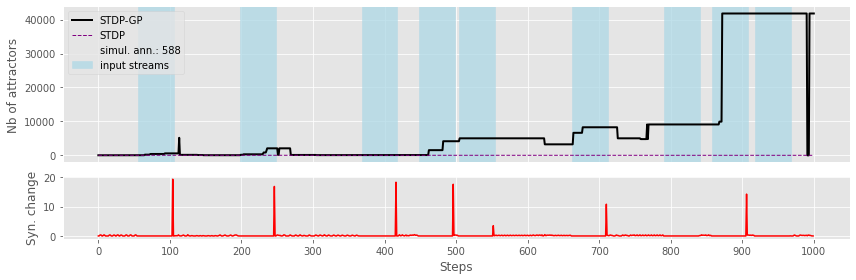

*** nb inputs 10 / seed 42 ***


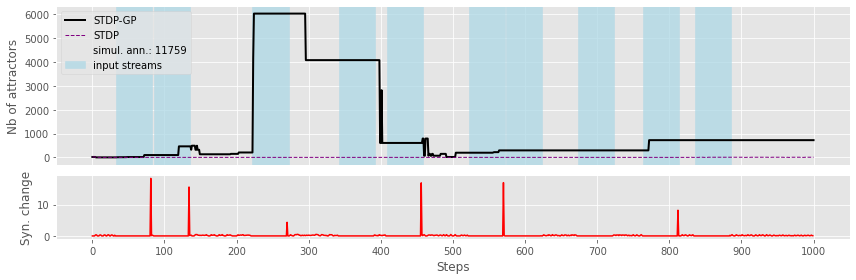

*** nb inputs 10 / seed 79 ***


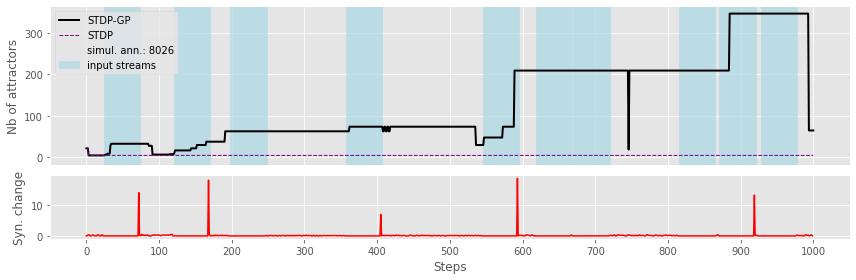

*** nb inputs 10 / seed 82 ***


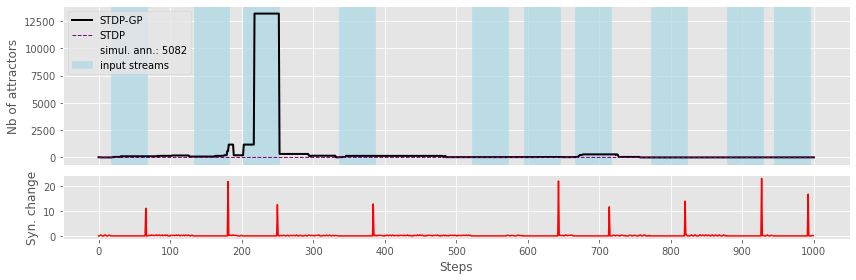

*** nb inputs 10 / seed 83 ***


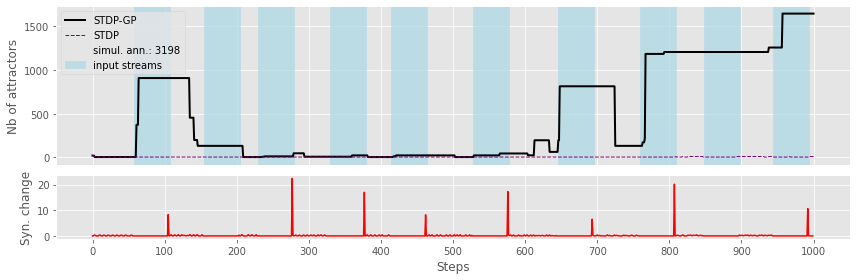

*** nb inputs 10 / seed 47 ***


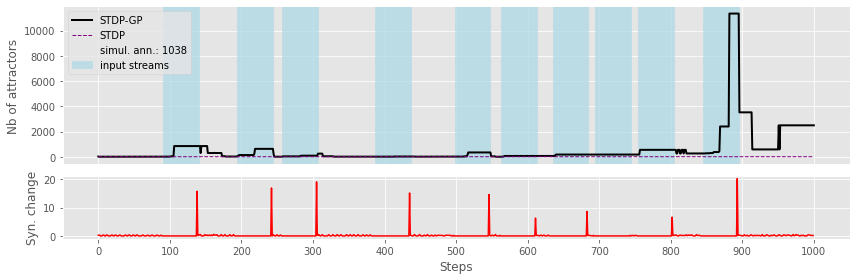

*** nb inputs 10 / seed 49 ***


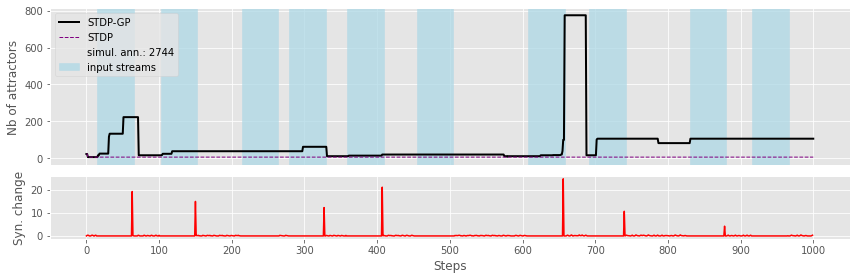

*** nb inputs 10 / seed 13 ***


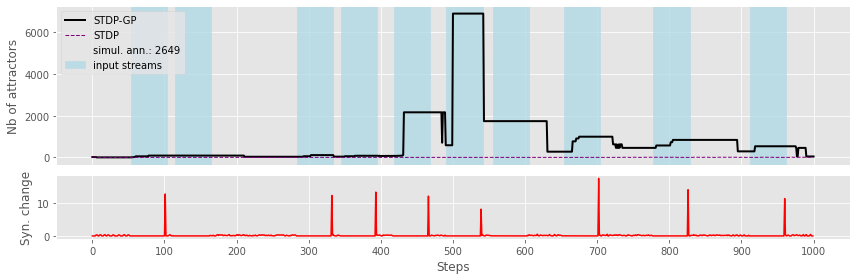

*** nb inputs 10 / seed 77 ***


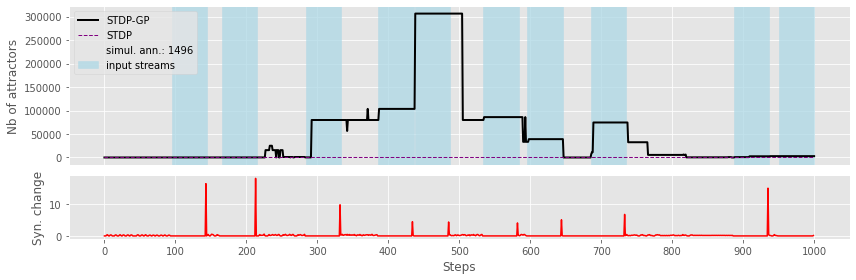

*** nb inputs 10 / seed 55 ***


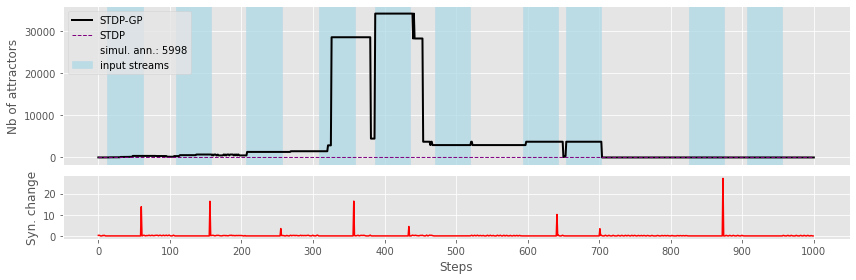

*** nb inputs 10 / seed 15 ***


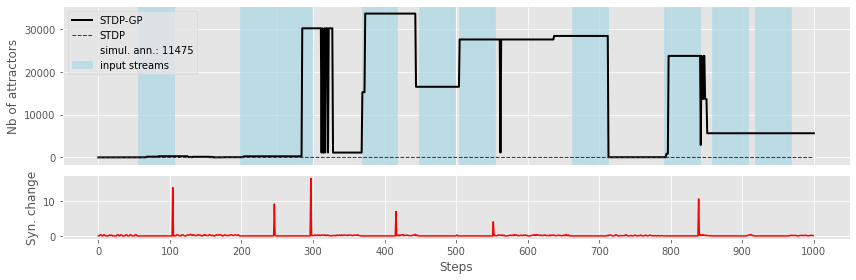

*** nb inputs 11 / seed 42 ***


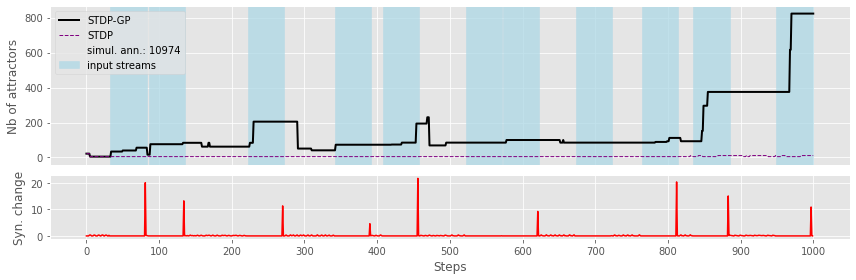

*** nb inputs 11 / seed 79 ***


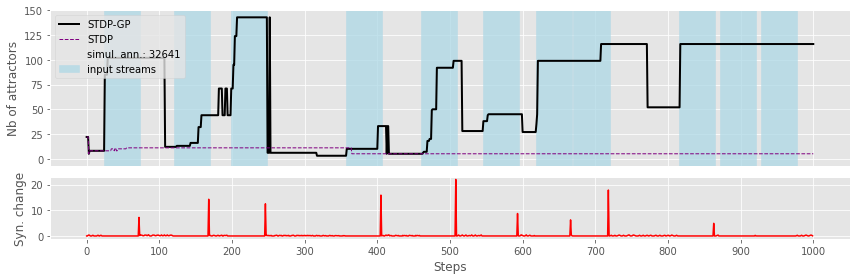

*** nb inputs 11 / seed 82 ***


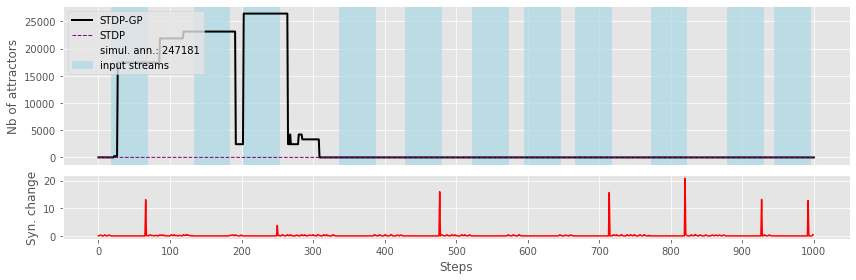

*** nb inputs 11 / seed 83 ***


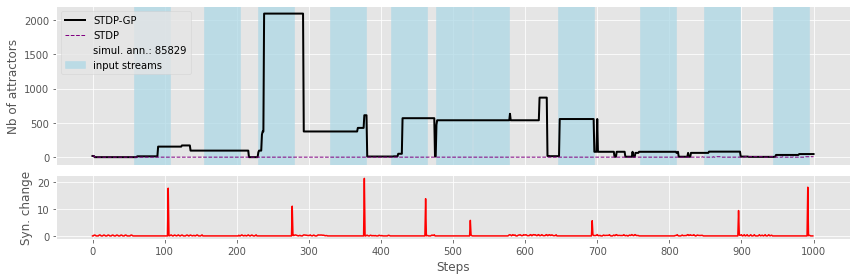

*** nb inputs 11 / seed 47 ***


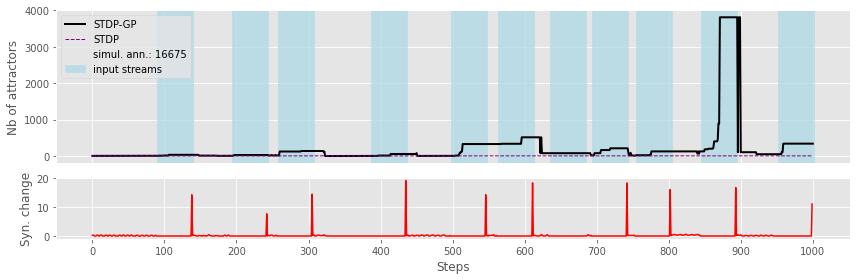

*** nb inputs 11 / seed 49 ***


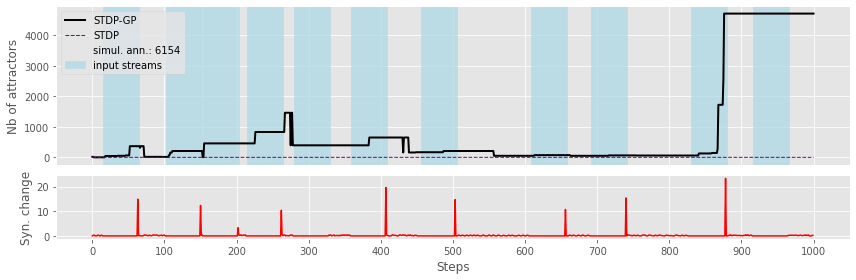

*** nb inputs 11 / seed 13 ***


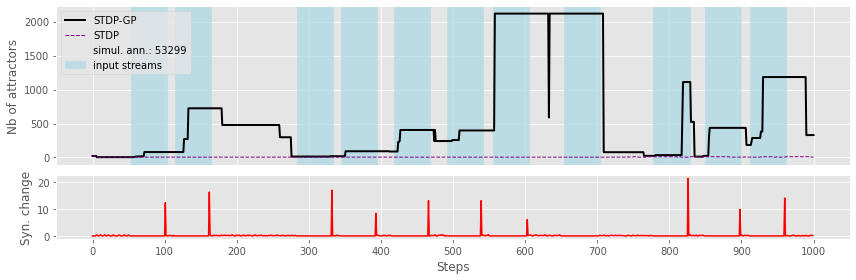

*** nb inputs 11 / seed 77 ***


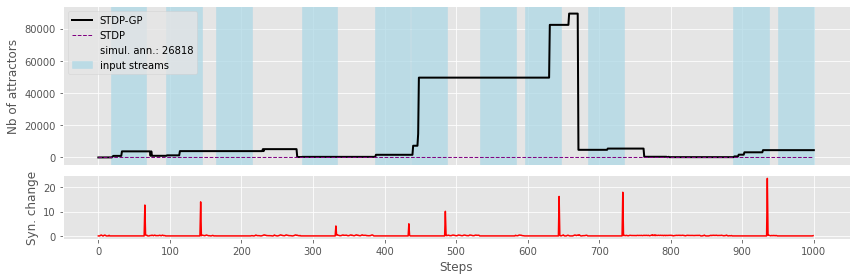

*** nb inputs 11 / seed 55 ***


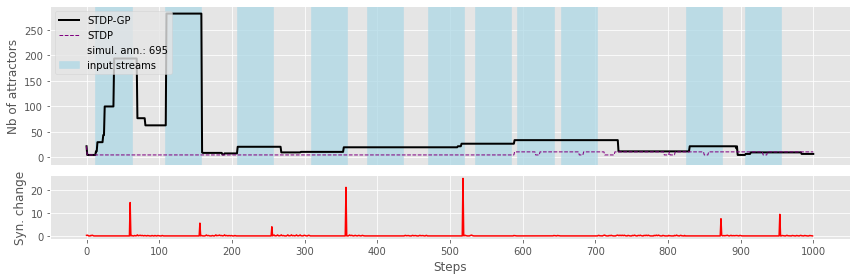

*** nb inputs 11 / seed 15 ***


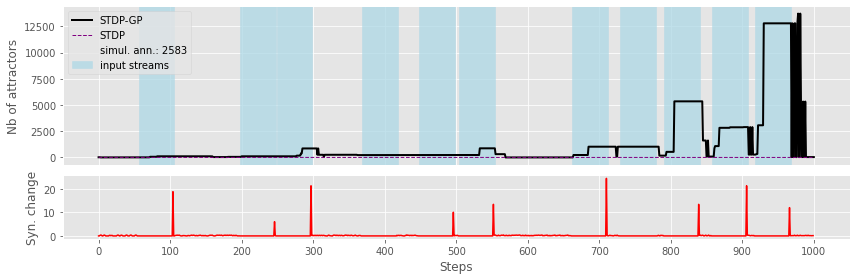

In [26]:
for nb_inputs in [1, 3, 5, 7, 9, 10, 11]:

    filespecs = [1001, 50, nb_inputs, None]

    for seed in [42, 79, 82, 83, 47, 49, 13, 77, 55, 15]:
        
        print(f"*** nb inputs {nb_inputs} / seed {seed} ***")
        filespecs[3] = seed

        results_d = get_results(filespecs)
        
        plot(results_d, filespecs)

## Plots for varying "etas"

In [29]:
def get_results(filespecs=(1001, 50, 10, 77, [0.005, 0.01, 0.015, 0.02, 0.025, 0.03])):

    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]
    etas =  filespecs[4]
    mode = "stdp-gp"
    results_d = {}

    results_d = {}

    for eta in etas:

        filename = f"sim_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pkl"

        with open(filename, "rb") as fh:
            results = pickle.load(fh)

        results_d[eta] = {}
        nb_attractors = results[0][-input_length:]
        results_d[eta]["nb_attractors"] = nb_attractors
        ticks = results[1]
        results_d[eta]["ticks"] = ticks
        synapses_l = results[2]
        abs_diff_l = compute_abs_diffs(synapses_l)
        results_d[eta]["syn_change"] = abs_diff_l

    return results_d

In [30]:
results_d = get_results()

In [31]:
results_d[0.005].keys()

dict_keys(['nb_attractors', 'ticks', 'syn_change'])

In [32]:
len(results_d[etas[0]]["nb_attractors"])

NameError: name 'etas' is not defined

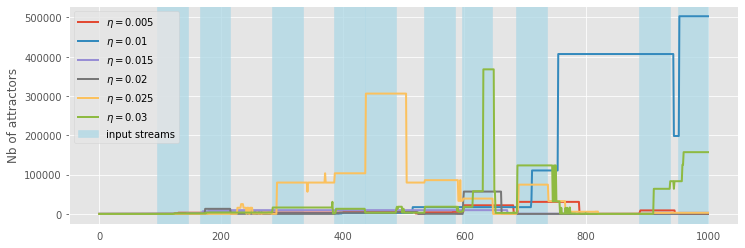

In [33]:
etas = list(results_d.keys())
etas.sort()

input_length = 1001
trigger_length = 50
nb_triggers = 10

plt.figure(figsize=(12, 4))

# Chunks start and end points
t0s = results_d[etas[0]]["ticks"]
t1s = [start + trigger_length for start in t0s]

# Plot number of attractors
for eta in etas:
    plt.plot(range(input_length), results_d[eta]["nb_attractors"], linewidth=2, label=f'$\eta={eta}$')
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)
plt.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    plt.axvspan(start, end, color='lightblue', alpha=0.75, label="input streams" if start == t0s[0] else "")
plt.legend(loc="upper left")


fig.tight_layout()
# plt.savefig(f"plots/plot_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_etas.pdf")
plt.show()

## Attractors

In [156]:
with open("M_best.pkl", "rb") as fh:
    M = pickle.load(fh)

In [157]:
A = netM_to_aut(M)
attractors = get_simple_cycles(A)

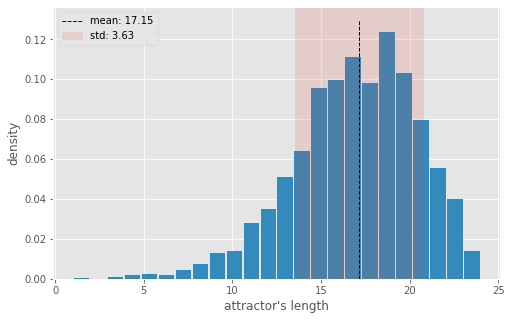

In [158]:
# stats of attractors
SCC = list(attractors.keys())[0] # first SCC
attractors_SCC = attractors[SCC][0]

lens = [len(c) for c in attractors_SCC]
len_mean = np.mean(lens).round(2)
len_std = np.std(lens).round(2)
len_mean, len_std

plt.figure(figsize=(8, 5))

plt.hist(lens, bins=np.max(lens), density=True, rwidth=0.9, color="C1")
ymin, ymax = plt.ylim()
plt.vlines(len_mean, ymin, ymax, color="black", linestyles="--", linewidth=1, label=f"mean: {len_mean}")
plt.axvspan(len_mean-len_std, len_mean+len_std, color='C0', alpha=0.15, label=f"std: {len_std}")

plt.legend(loc="upper left")

plt.legend()
plt.xlabel("attractor's length")
plt.ylabel("density")

plt.show()

In [163]:
attr_0 = attractors_SCC[0]
attr_1 = attractors_SCC[1]
attr_2 = attractors_SCC[2]

In [167]:
set(attr_0).intersection(set(attr_1).intersection(set(attr_2)))

{215, 386, 453, 471}

In [188]:
attrs = [attr_0, attr_1, attr_2]
inputs_streams = []

for i in range(3):

    attr = attrs[i]
    inputs_stream = []

    for j in range(len(attr)-1):
        x0_x1 = (attr[j], attr[j+1])
        input = dict(A[1])[x0_x1]
        inputs_stream.append(input)

    inputs_streams.append(inputs_stream)

In [193]:
for i in range(3):
    print(len(attrs[i]), inputs_streams[i])

8 [1, 0, 1, 1, 1, 0, 1]
21 [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]
18 [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0]


In [206]:
n = 5
U = n*inputs_streams[0] + n*inputs_streams[1] + n*inputs_streams[2]
U = {k : v for k, v in zip(range(len(U)), U)}

history, _, _ = simulation(M[0], M[1], M[2], M[3], M[4], U, epoch=len(U))

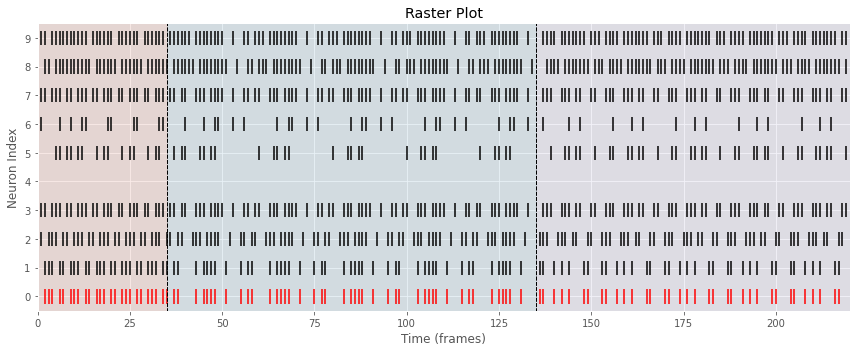

In [238]:
fig, ax = plt.subplots(figsize=(12, 5))

inputs = history[0, :]
activity = history[1:, :]

input_times = np.where(inputs == 1)[0]      # Find indices where spikes occur
ax.vlines(input_times, 0 - 0.25, 0 + 0.25, color='red')

for neuron_idx, spikes in enumerate(activity):
    spike_times = np.where(spikes == 1)[0]  # Find indices where spikes occur
    ax.vlines(spike_times, neuron_idx + 1 - 0.25, neuron_idx + 1 + 0.25, color='black')

colors = ['C0', 'C1', 'C2']
ymin, ymax = plt.ylim()
l = 0
for i, u in enumerate(inputs_streams):
    u = l + n*len(u)
    ax.axvspan(l, u, alpha=0.1, color=colors[i])
    ax.vlines([l, u], ymin, ymax, color="black", linestyles="--", linewidths=1)
    l = u

# Set the limits and labels
ax.set_xlim(0, activity.shape[1])
ax.set_ylim(-0.5, activity.shape[0]+0.5)
ax.set_xlabel('Time (frames)')
ax.set_ylabel('Neuron Index')
ax.set_yticks(range(activity.shape[0]+1))
ax.set_title('Raster Plot')

# Show the plot
plt.tight_layout()
plt.show()


- **OK** attractors' stats
- raster plot
- STDP variable
- relancer simuls